### Yahoo Japan

In [38]:
from bs4 import BeautifulSoup
import requests
search = '渡韓ごっこ'
verbose = ''

for i in range(50) :
    url = "https://chiebukuro.yahoo.co.jp/search/?p="+search+"&ei=UTF-8&aq=1&oq=kannkoku&x=nl&b="+str(i)+'1'
    response = requests.get(url)
    response.encoding = response.apparent_encoding

    bs = BeautifulSoup(response.text, 'html.parser')
    bs_ul = bs.find('div')


    for bs_li in bs_ul.find_all('div'):
        bs_text = bs_li.text
        if bs_text != '' and bs_text != '\n' :
            print(bs_text)
            verbose += bs_text

キーワードを消すカテゴリQ&A一覧公式・専門家質問・相談JavaScriptが無効です。ブラウザの設定でJavaScriptを有効にしてください。JavaScriptを有効にするには「渡韓ごっこ」の検索結果質問一覧渡韓ごっこが人気 ＼(^o^)／ 最近、日本のMZ世代（ミレニアム世代とZ世代、1980年～2...1980年～2004年生れ）の間で『渡韓ごっこ』が人気だ。渡韓ごっこはいわゆるニセ韓国旅行だ。日本のホテルで韓国料理を食べたり韓国の飲み物...解決済み質問日時：2022/1/26 22:42回答数：1閲覧数：21ニュース、政治、国際情勢>国際情勢渡韓ごっこという話が炎上してますが、韓流好きのみなさんの周りで渡韓ごっこしてる人いますか？ イ...インスタみたら「渡韓ごっこ」というタグ投稿がたった1000件しかないのに流行ってるといえるのか？とか色々批判があるようですが、...質問日時：2021/8/2 13:25回答数：5閲覧数：174エンターテインメントと趣味>テレビ、ラジオ>アジア・韓国ドラマ友達と渡韓ごっこやホカンスを冬休みにやりたいって計画立ててるんですけど東京、神奈川(、埼玉、千葉)に格安ホテルってありませんか？予算としては4000以下を考えています。教えてください、、！！解決済み質問日時：2022/6/28 1:57回答数：2閲覧数：38地域、旅行、お出かけ>国内>ホテル、旅館若い女性が「渡韓ごっこ」、第４次ブームに沸く関西のコリアタウン…「日本の中で異文化体験」 5/5/13(金) 21:00 配信 https://news.yahoo.co.jp/articles/89e6e01af5a...質問日時：2022/5/15 8:46回答数：1閲覧数：33ニュース、政治、国際情勢>政治、社会問題『渡韓ごっこ』って？ . 一部ウェブニュースなどで若い人の間でそのような遊びが流行っていると書...書き立てられているようですが、それをやる人たちは本当にそれで渡韓の代償行為になっているのでしょうか？ 『渡韓ごっこ』普及の実態...解決済み質問日時：2022/1/1 8:17回答数：1閲覧数：57地域、旅行、お出かけ>海外渡韓ごっこは男性は歓迎されない場合が多いのでしょうか？質問日時：2022/5/17 23:16回答数：1閲覧数：9生き方と恋愛、人間関係

In [39]:
import re
string_without_newline = re.sub(r"\n[\s0-9'月火水木金土日']", " ", verbose)
string_without_special_chars = re.sub('[\\s]+', '', string_without_newline)

In [40]:
# python解析器janomeをインポート - 1
from janome.tokenizer import Tokenizer

# 形態素解析用オブジェクトの生成 - 2
text = Tokenizer()

In [41]:
txt = string_without_special_chars

# txtから読み込んだデータを形態素解析 - 4
#lines = txt.split("\r\n")
#for i in lines:
    #print(i)
    #print("\n")
    #text_c = text.tokenize(i)
    #for j in text_c:
        #print(j)

#print("\n")

In [42]:
# テキストを一行ごとに処理 - 5
word_dic = {}
lines_1 = txt.split("\r\n")
#print(lines_1)
#print("\n")
for line in lines_1:
    malist = text.tokenize(line)
    for w in malist:
        word = w.surface
        ps = w.part_of_speech # 品詞 - 6
        if ps.find("名詞") < 0: continue # 名詞だけをカウント - 7
        if not word in word_dic:
            word_dic[word] = 0
        word_dic[word] += 1

In [82]:
# よく使われる単語を表示 - 8
keys = sorted(word_dic.items(), key = lambda x:x[1] , reverse=True)
tab = ['検索','件','質問','条件','回答','&','キーワード','結果','数','解決','広告','脱字','誤字','指定','ヒント','カテゴリ','専門','ブラウザ','閲覧','プライバシー','問い合わせ','-','キーワード','Q','©',':','指定']
for i in range(300) :
    if keys[i][0].isalpha() == False :
        keys.pop(i)
    if keys[i][0] in '！＠＃＄％＾＆＊（）：:「」『』’”/(/) /)':
        keys.pop(i)
    if keys[i][0].isascii() :
        keys.pop(i)
    if keys[i][0] in tab :
        keys.pop(i)
    if keys[i][0].isnumeric() == True :
        keys.pop(i)
for word, cnt in keys[:100]:
    print("{0}({1}) ".format(word,cnt), end="")

-(1466) 韓(884) 渡(854) ごっこ(824) 方(700) Q(626) キーワード(500) 有効(500) 数(426) 利用(406) 済み(402) ご(400) 言葉(382) 一致(376) 再(376) 指定(376) 脱字(376) 確認(376) 中(336) 相談(318) 受付(306) 答え(300) 対象(300) すべて(300) 一覧(268) 順(264) 日時(258) 公式(250) 家(250) 無効(250) 設定(250) プライバシー(200) 規約(200) 掲載(200) メディア(200) ステートメント(200) ルール(200) 意見(200) 要望(200) ヘルプ(200) お(200) JASRAC(200) 許諾(200) 番号(200) ©(200) ...(162) 韓国(156) 政治(102) の(102) 国際(66) 情勢(66) ニュース(54) 日本(48) 問題(48) 更新(48) お礼(48) 人(42) エンターテインメント(42) 趣味(42) ん(42) 社会(42) 人気(36) 旅行(36) よう(36) 恋愛(36) 人間(36) 関係(36) 悩み(36) 料理(30) 好き(30) テレビ(30) アジア(30) 代(30) もの(30) 度(30) 何(30) 音楽(30) 次(27) 世代(24) 年(24) ホテル(24) 友達(24) 地域(24) お出かけ(24) こと(24) 前(24) 関連(24) 新大久保(24) 地(24) どこ(24) コロナ(24) 若者(24) カメラ(24) アイドル(24) 最近(18) 間(18) 周り(18) インスタ(18) 国内(18) e(18) 

In [83]:
keys = dict(keys[61:])
print(keys)

{'人気': 36, '旅行': 36, 'よう': 36, '恋愛': 36, '人間': 36, '関係': 36, '悩み': 36, '料理': 30, '好き': 30, 'テレビ': 30, 'アジア': 30, '代': 30, 'もの': 30, '度': 30, '何': 30, '音楽': 30, '次': 27, '世代': 24, '年': 24, 'ホテル': 24, '友達': 24, '地域': 24, 'お出かけ': 24, 'こと': 24, '前': 24, '関連': 24, '新大久保': 24, '地': 24, 'どこ': 24, 'コロナ': 24, '若者': 24, 'カメラ': 24, 'アイドル': 24, '最近': 18, '間': 18, '周り': 18, 'インスタ': 18, '国内': 18, 'e': 18, 'それ': 18, '生き方': 18, '観光': 18, 'テレビ朝日': 18, '今': 18, '話題': 18, '今日': 18, 'モーニングショー': 18, '表示': 18, '順序': 18, '女': 18, '女の子': 18, '禍': 18, 'ファン': 18, 'マスター': 18, 'さん': 18, '反日': 18, '目': 15, '42': 12, '話': 12, '流': 12, 'みなさん': 12, 'ラジオ': 12, 'ドラマ': 12, '女性': 12, '一部': 12, '遊び': 12, 'たち': 12, '男性': 12, '歓迎': 12, 'ステマ': 12, '散々': 12, 'ため': 12, '嫌い': 12, '事': 12, '番組': 12, '大': 12, '流行': 12, '程度': 12, 'わたくし': 12, '月': 12, '日': 12, 'ネット': 12, '行楽': 12, '雑談': 12, '飛行機': 12, '空港': 12, 'フェリー': 12, '港': 12, '入国': 12, '大久保': 12, '男': 12, '大学生': 12, '都内': 12, '近辺': 12, '下': 12, '候補': 12, '以外': 12, 'そう': 12, '

(-0.5, 1999.5, 1599.5, -0.5)

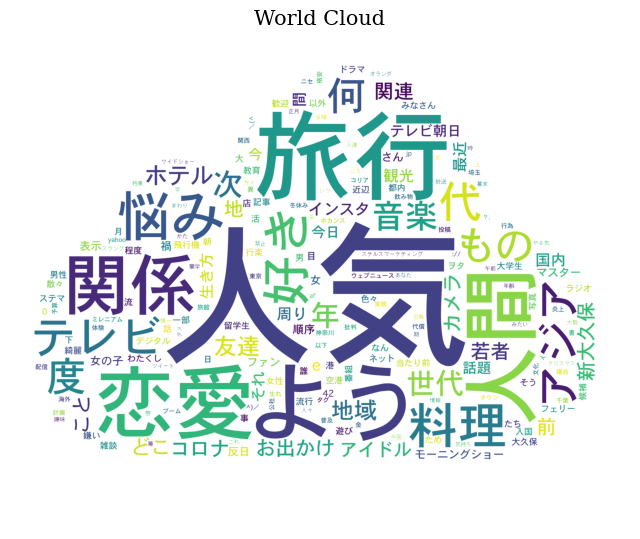

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

im = Image.open('cloud.png')
mask_arr = np.array(im)
font_path = "/Library/Fonts/Osaka.ttf"
wc = WordCloud(font_path = font_path, width=400, height=400, scale=2.0, max_font_size=250, mask = mask_arr, background_color = 'white')
gen = wc.generate_from_frequencies(keys)
plt.figure(figsize = (8, 8))
plt.imshow(gen)
plt.title("World Cloud", fontsize = 15, fontfamily = 'Serif')
plt.axis('off')

### Twitter

In [28]:
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [37]:
keyword = '渡韓ごっこ'
search = api.search_tweets(q = keyword, lang = 'jp')

Forbidden: 403 Forbidden
453 - You currently have access to Twitter API v2 endpoints and limited v1.1 endpoints only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

### Google Trend

In [85]:
import pytrends as pt
from pytrends.request import TrendReq
import plotly.express as px

pytrends = TrendReq(hl = 'jp', tz=540)

keyword_list = ['韓国','ソウル','BTS','キムチ','カルビ'] #한번에 5개 키워드 제한

pytrends.build_payload(keyword_list, cat=0, timeframe='2015-01-01 2023-05-22', geo='JP')
pytrends.trending_searches(pn='japan')
data = pytrends.interest_over_time()
data = data.reset_index()

figure = px.line(data, x = "date", y = keyword_list, title = "グーグルトレンド")
figure.show()